In [ ]:
import numpy as np

# Utility functions to identify and optionally drop frames containing sentinel values in a given feature

def frames_with_sentinel(
    df: pd.DataFrame,
    features: str | list[str] = "mom-id",
    frame_col: str = "frame76_loc_id",
    sentinel: int | float = 32767,
):
    """Return sorted frame IDs where *any* selected feature contains the sentinel.

    Parameters
    ----------
    df : pd.DataFrame
        Input dataframe containing at least `features` and `frame_col`.
    features : str or list[str], default "mom-id"
        One or more column names to test. Hyphenated names are supported.
    frame_col : str, default "frame76_loc_id"
        Column that identifies the timeframe/frame.
    sentinel : int or float, default 32767
        The sentinel value indicating an out-of-range/missing feature.

    Returns
    -------
    np.ndarray
        Sorted unique frame IDs that contain at least one sentinel occurrence
        in any of the specified `features`.
    """
    # Normalize to list
    if isinstance(features, str):
        features = [features]

    # Validate columns
    missing = [c for c in features if c not in df.columns]
    if missing:
        raise KeyError(
            f"Feature column(s) not found: {missing}. Available: {list(df.columns)}"
        )
    if frame_col not in df.columns:
        raise KeyError(
            f"Frame column '{frame_col}' not found in dataframe columns: {list(df.columns)}"
        )

    # Build a combined boolean mask over all requested features
    mask_any = None
    for col in features:
        series = df[col]
        if not np.issubdtype(series.dtype, np.number):
            series = pd.to_numeric(series, errors="coerce")
        m = series == sentinel
        mask_any = m if mask_any is None else (mask_any | m)

    if mask_any is None:
        return np.array([], dtype=df[frame_col].dtype)

    bad_frames = (
        df.loc[mask_any, frame_col]
          .dropna()
          .unique()
    )
    return np.sort(bad_frames)


def drop_frames_with_sentinel(
    df: pd.DataFrame,
    features: str | list[str] = "mom-id",
    frame_col: str = "frame76_loc_id",
    sentinel: int | float = 32767,
) -> pd.DataFrame:
    """Return a copy of `df` with frames removed that contain the sentinel in *any* feature."""
    bad = frames_with_sentinel(df, features=features, frame_col=frame_col, sentinel=sentinel)
    if getattr(bad, "size", 0) == 0:
        return df.copy()
    return df.loc[~df[frame_col].isin(bad)].copy()



In [ ]:
import pandas as pd

df = pd.read_csv('/Users/anatolelobenko/PyCharmMiscProject/Data Mining /wildfire_runtime50_60_clean.csv')

In [ ]:
# Example usage with your feature list (uncomment to run):
feature_list = ["pr","rmax","rmin","sph","srad","tmmn","tmmx","vs","bi",
     "fm100","fm1000","erc","etr","pet","vpd"]
bad_frames = frames_with_sentinel(df, features=feature_list, frame_col="frame75_loc_id", sentinel=32767)
print(f"Found {bad_frames.size} frames with sentinel in any feature:", bad_frames)


Found 343 frames with sentinel in any feature: [  2113   3170   7900  11387  12567  16618  18054  22955  24114  26445
  28009  28826  28933  29084  34283  38125  38147  38744  39936  44576
  45704  45812  46280  46588  47055  47792  52878  52885  53600  53974
  55410  55987  56397  56749  56777  58787  59072  60784  61346  62669
  63521  64099  64331  64634  68134  68674  68974  69567  70059  70366
  70424  70629  71259  71708  73522  74238  77429  79824  79976  80124
  81215  81901  82100  83322  83795  84793  84920  85020  85503  85788
  86213  86525  86983  87333  87578  88268  88486  89692  90059  90619
  90864  90924  92083  92173  93419  93817  94290  94554  95592  95830
  97027  97355  97826  97827  98265  98546  98600  98780  99250  99350
  99488  99666  99748 100223 100397 100522 100960 101002 101218 101397
 101588 101609 102026 102218 102240 102246 102576 102623 103401 103579
 103695 103723 103941 104106 104113 104228 104297 104505 104558 104709
 105975 106085 106352 106561 1

In [ ]:
df_clean = drop_frames_with_sentinel(df, features=feature_list, frame_col="frame75_loc_id", sentinel=32767)
print(f"Rows before: {len(df):,}; after drop: {len(df_clean):,}")

Rows before: 1,388,827; after drop: 1,385,054


In [ ]:
df_clean

,latitude,longitude,datetime,Wildfire,pr,rmax,rmin,sph,srad,tmmn,...,fm1000,erc,etr,pet,vpd,loc_id,runtime,gap_before_finish,dup_or_backwards,frame75_loc_id
0,48.128431,-97.276685,2014-10-05,No,0.0,68.8,30.0,0.00304,163.9,274.7,...,17.1,34.0,4.2,2.7,0.55,0,50,False,False,0
1,48.128431,-97.276685,2014-10-06,No,0.0,69.5,26.9,0.00301,160.8,274.4,...,16.8,37.0,4.7,3.0,0.60,0,51,False,False,0
2,48.128431,-97.276685,2014-10-07,No,0.0,87.2,30.9,0.00311,161.0,271.5,...,16.8,36.0,3.7,2.4,0.47,0,52,False,False,0
3,48.128431,-97.276685,2014-10-08,No,0.0,92.9,32.5,0.00301,118.8,270.2,...,16.8,35.0,3.0,2.0,0.41,0,53,False,False,0
4,48.128431,-97.276685,2014-10-09,No,0.0,100.0,34.7,0.00318,120.4,269.1,...,16.8,33.0,2.3,1.6,0.36,0,54,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388822,41.078600,-123.687000,2014-08-15,No,0.0,75.1,21.7,0.00775,312.2,286.1,...,7.9,72.0,10.2,7.3,2.14,37097,56,False,False,126514
1388823,41.078600,-123.687000,2014-08-16,No,0.0,62.8,17.6,0.00724,308.1,287.8,...,7.9,74.0,10.2,7.3,2.60,37097,57,False,False,126514
1388824,41.078600,-123.687000,2014-08-17,No,0.0,57.4,19.1,0.00699,313.7,288.6,...,7.9,75.0,10.4,7.4,2.40,37097,58,False,False,126514
1388825,41.078600,-123.687000,2014-08-18,No,0.0,63.6,24.7,0.00807,300.4,289.3,...,8.0,74.0,10.8,7.6,2.07,37097,59,False,False,126514


In [ ]:
# Ensure required dtypes
df_clean["runtime"] = df_clean["runtime"].astype(int)

# 1) Sum pr over the pre-ignition window (days 50–59) per frame
pre10_mask = df_clean["runtime"] < 60
sum_pr_10d = (
    df_clean.loc[pre10_mask]
      .groupby("frame75_loc_id", observed=True)["pr"]
      .sum(min_count=1)  # yields NaN if a frame has zero rows in 50–59
      .rename("sum_pr_pre10")
)

# 2) Attach back to the main dataframe as a new variable
df_clean = df_clean.join(sum_pr_10d, on="frame75_loc_id")

In [ ]:
df_clean

,latitude,longitude,datetime,Wildfire,pr,rmax,rmin,sph,srad,tmmn,...,erc,etr,pet,vpd,loc_id,runtime,gap_before_finish,dup_or_backwards,frame75_loc_id,sum_pr_pre10
0,48.128431,-97.276685,2014-10-05,No,0.0,68.8,30.0,0.00304,163.9,274.7,...,34.0,4.2,2.7,0.55,0,50,False,False,0,9.5
1,48.128431,-97.276685,2014-10-06,No,0.0,69.5,26.9,0.00301,160.8,274.4,...,37.0,4.7,3.0,0.60,0,51,False,False,0,9.5
2,48.128431,-97.276685,2014-10-07,No,0.0,87.2,30.9,0.00311,161.0,271.5,...,36.0,3.7,2.4,0.47,0,52,False,False,0,9.5
3,48.128431,-97.276685,2014-10-08,No,0.0,92.9,32.5,0.00301,118.8,270.2,...,35.0,3.0,2.0,0.41,0,53,False,False,0,9.5
4,48.128431,-97.276685,2014-10-09,No,0.0,100.0,34.7,0.00318,120.4,269.1,...,33.0,2.3,1.6,0.36,0,54,False,False,0,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388822,41.078600,-123.687000,2014-08-15,No,0.0,75.1,21.7,0.00775,312.2,286.1,...,72.0,10.2,7.3,2.14,37097,56,False,False,126514,0.0
1388823,41.078600,-123.687000,2014-08-16,No,0.0,62.8,17.6,0.00724,308.1,287.8,...,74.0,10.2,7.3,2.60,37097,57,False,False,126514,0.0
1388824,41.078600,-123.687000,2014-08-17,No,0.0,57.4,19.1,0.00699,313.7,288.6,...,75.0,10.4,7.4,2.40,37097,58,False,False,126514,0.0
1388825,41.078600,-123.687000,2014-08-18,No,0.0,63.6,24.7,0.00807,300.4,289.3,...,74.0,10.8,7.6,2.07,37097,59,False,False,126514,0.0


In [ ]:
#Drop timeframes where positive ignition before 60

In [ ]:
# Drop frames with positive ignition strictly before runtime == 60
import pandas as pd

_src = df_clean if "df_clean" in globals() else df

# Robust boolean coercion for the Wildfire column (works for strings/numbers/bools)
wf = (
    _src["Wildfire"].astype(str).str.strip().str.lower()
    .map({
        "true": True, "t": True, "1": True, "yes": True, "y": True,
        "false": False, "f": False, "0": False, "no": False, "n": False,
    })
)
wf = wf.where(~wf.isna(), pd.to_numeric(_src["Wildfire"], errors="coerce") == 1)
wf = wf.fillna(False)

r = _src["runtime"].astype(int)

# Frames that ignited before the event day
bad_frames = (
    _src.loc[(r < 60) & wf, "frame75_loc_id"]
        .dropna()
        .unique()
)

# Filter them out
_df_no_early_ignition = _src.loc[~_src["frame75_loc_id"].isin(bad_frames)].copy()
print(
    f"Dropped {len(_src) - len(_df_no_early_ignition):,} rows from "
    f"{len(bad_frames):,} frames with early ignition (<60)."
)

# Persist back
if "df_clean" in globals():
    df_clean = _df_no_early_ignition
else:
    df = _df_no_early_ignition

Dropped 649 rows from 59 frames with early ignition (<60).


## Labels

In [ ]:
# Open NLCD 2021 Land Cover (GeoTIFF)
nlcd_path = "/Users/anatolelobenko/Downloads/Annual_NLCD_LndCov_2021_CU_C1V1/Annual_NLCD_LndCov_2021_CU_C1V1.tif"

In [ ]:
# Load NLCD raster at `nlcd_path` and assign land-cover to every location
# Requirements: rasterio, pyproj (rasterio includes pyproj via rasterio.warp)
import numpy as np
import pandas as pd
import rasterio
from rasterio.warp import transform as rio_transform

# Choose source dataframe
_df_src = df_clean if "df_clean" in globals() else df

# Safety: drop existing columns from previous runs
_df_src = _df_src.drop(columns=["nlcd_code", "nlcd_label"], errors="ignore")

# NLCD 2021 class mapping (conus legend)
NLCD_LABELS = {
    11: "Open Water",
    12: "Perennial Ice/Snow",
    21: "Developed, Open Space",
    22: "Developed, Low Intensity",
    23: "Developed, Medium Intensity",
    24: "Developed, High Intensity",
    31: "Barren Land (Rock/Sand/Clay)",
    41: "Deciduous Forest",
    42: "Evergreen Forest",
    43: "Mixed Forest",
    52: "Shrub/Scrub",
    71: "Grassland/Herbaceous",
    81: "Pasture/Hay",
    82: "Cultivated Crops",
    90: "Woody Wetlands",
    95: "Emergent Herbaceous Wetlands",
}

# Helper to sample raster in chunks to avoid memory spikes
def sample_nlcd_codes(lon_series: pd.Series, lat_series: pd.Series, chunk: int = 100_000):
    codes = np.empty(len(lon_series), dtype=np.int32)
    codes.fill(-9999)  # fill with sentinel for nodata/outside
    with rasterio.open(nlcd_path) as src:
        src_crs = src.crs
        nodata = src.nodata
        # Process in chunks for large dataframes
        for start in range(0, len(lon_series), chunk):
            end = min(start + chunk, len(lon_series))
            lons = lon_series.iloc[start:end].to_numpy()
            lats = lat_series.iloc[start:end].to_numpy()
            # Transform from EPSG:4326 (lon, lat) to raster CRS
            X, Y = rio_transform({"init": "EPSG:4326"}, src_crs, lons, lats)
            # Sample band 1 at these positions
            # rasterio.sample expects iterable of (x, y) in the raster CRS
            coords = list(zip(X, Y))
            vals = list(src.sample(coords))  # each is array([value], dtype=...)
            # Flatten and coerce, respecting nodata
            for i, arr in enumerate(vals, start=start):
                v = arr[0]
                if nodata is not None and v == nodata:
                    codes[i] = -9999
                elif np.isnan(v):
                    codes[i] = -9999
                else:
                    try:
                        codes[i] = int(v)
                    except Exception:
                        codes[i] = -9999
    return codes

# Run sampling
codes = sample_nlcd_codes(_df_src["longitude"], _df_src["latitude"], chunk=100_000)

# Attach to dataframe
_df_out = _df_src.copy()
_df_out["nlcd_code"] = codes
_df_out["nlcd_label"] = pd.Series(codes, index=_df_out.index).map(NLCD_LABELS)

# Basic report
unique_codes = np.unique(codes)
print("NLCD codes found:", unique_codes[:20], "... (total:", unique_codes.size, ")")
print(_df_out[["nlcd_code", "nlcd_label"]].head())

# Persist back to the working dataframe
if "df_clean" in globals():
    df_clean = _df_out
else:
    df = _df_out

NLCD codes found: [-9999    11    21    22    23    24    31    41    42    43    52    71
    81    82    90    95] ... (total: 16 )
   nlcd_code             nlcd_label
0         21  Developed, Open Space
1         21  Developed, Open Space
2         21  Developed, Open Space
3         21  Developed, Open Space
4         21  Developed, Open Space


In [ ]:
df_clean

,latitude,longitude,datetime,Wildfire,pr,rmax,rmin,sph,srad,tmmn,...,pet,vpd,loc_id,runtime,gap_before_finish,dup_or_backwards,frame75_loc_id,sum_pr_pre10,nlcd_code,nlcd_label
0,48.128431,-97.276685,2014-10-05,No,0.0,68.8,30.0,0.00304,163.9,274.7,...,2.7,0.55,0,50,False,False,0,9.5,21,"Developed, Open Space"
1,48.128431,-97.276685,2014-10-06,No,0.0,69.5,26.9,0.00301,160.8,274.4,...,3.0,0.60,0,51,False,False,0,9.5,21,"Developed, Open Space"
2,48.128431,-97.276685,2014-10-07,No,0.0,87.2,30.9,0.00311,161.0,271.5,...,2.4,0.47,0,52,False,False,0,9.5,21,"Developed, Open Space"
3,48.128431,-97.276685,2014-10-08,No,0.0,92.9,32.5,0.00301,118.8,270.2,...,2.0,0.41,0,53,False,False,0,9.5,21,"Developed, Open Space"
4,48.128431,-97.276685,2014-10-09,No,0.0,100.0,34.7,0.00318,120.4,269.1,...,1.6,0.36,0,54,False,False,0,9.5,21,"Developed, Open Space"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388822,41.078600,-123.687000,2014-08-15,No,0.0,75.1,21.7,0.00775,312.2,286.1,...,7.3,2.14,37097,56,False,False,126514,0.0,81,Pasture/Hay
1388823,41.078600,-123.687000,2014-08-16,No,0.0,62.8,17.6,0.00724,308.1,287.8,...,7.3,2.60,37097,57,False,False,126514,0.0,81,Pasture/Hay
1388824,41.078600,-123.687000,2014-08-17,No,0.0,57.4,19.1,0.00699,313.7,288.6,...,7.4,2.40,37097,58,False,False,126514,0.0,81,Pasture/Hay
1388825,41.078600,-123.687000,2014-08-18,No,0.0,63.6,24.7,0.00807,300.4,289.3,...,7.6,2.07,37097,59,False,False,126514,0.0,81,Pasture/Hay


In [ ]:
#EDA Distribution of Labels

# --- Distribution of fire ignitions at runtime==60 by land-cover label ---
import pandas as pd

def ignition_distribution_by_landcover(
    df: pd.DataFrame,
    label_col: str = "nlcd_label",
    code_col: str = "nlcd_code",
    wildfire_col: str = "Wildfire",
    runtime_col: str = "runtime",
    event_runtime: int = 60,
    drop_unknown_codes: bool = True,
    unknown_codes: tuple = (-9999,),   # sentinel(s) for nodata/outside
) -> pd.DataFrame:
    """
    Compute per-land-cover counts and rates of ignition on the event day (runtime==60).

    Returns a DataFrame with:
      - label: land-cover label
      - ignitions: number of rows with Wildfire==True at runtime==60
      - total_at_60: total rows for that label at runtime==60
      - rate_within_label: ignitions / total_at_60
      - share_of_all_ignitions: ignitions / sum(ignitions over all labels)

    Assumes df has columns: [nlcd_label, nlcd_code, Wildfire, runtime].
    """

    # 1) Filter to event day (no future leakage)
    df60 = df.loc[df[runtime_col].astype(int) == event_runtime, [label_col, code_col, wildfire_col]].copy()

    # 2) Optionally drop unknown/NoData land-cover classes
    if drop_unknown_codes and code_col in df60.columns:
        df60 = df60.loc[~df60[code_col].isin(unknown_codes)]

    # 3) Robust coercion of Wildfire to boolean
    wf_str = df60[wildfire_col].astype(str).str.strip().str.lower()
    wf_map = wf_str.map({
        "true": True, "t": True, "1": True, "yes": True, "y": True,
        "false": False, "f": False, "0": False, "no": False, "n": False,
    })
    wf_num = pd.to_numeric(df60[wildfire_col], errors="coerce")
    df60["_wf"] = wf_map.where(~wf_map.isna(), wf_num.eq(1)).fillna(False)

    # 4) Group by label and aggregate
    g = df60.groupby(label_col, dropna=False)
    out = g["_wf"].agg(ignitions="sum", total_at_60="size").reset_index()
    out["ignitions"] = out["ignitions"].astype(int)
    out["rate_within_label"] = (out["ignitions"] / out["total_at_60"]).astype(float)

    total_ignitions = out["ignitions"].sum()
    out["share_of_all_ignitions"] = (out["ignitions"] / total_ignitions) if total_ignitions > 0 else 0.0

    # 5) Sort: most ignitions first
    out = out.sort_values(["ignitions", "rate_within_label"], ascending=[False, False], kind="mergesort").reset_index(drop=True)
    return out

# Example usage:
_src = df_clean if "df_clean" in globals() else df
dist = ignition_distribution_by_landcover(_src)
print(dist)
# If you want percentages rounded:
# display(dist.assign(
#     rate_within_label=(dist["rate_within_label"]*100).round(2),
#     share_of_all_ignitions=(dist["share_of_all_ignitions"]*100).round(2)
# ))

                      nlcd_label  ignitions  total_at_60  rate_within_label  \
0       Developed, Low Intensity       5727        19801           0.289228   
1                    Shrub/Scrub       4991        19929           0.250439   
2               Evergreen Forest       4570        19542           0.233855   
3    Developed, Medium Intensity       4383         9262           0.473224   
4          Developed, Open Space       4241        17816           0.238044   
5           Grassland/Herbaceous       2803        11608           0.241471   
6               Deciduous Forest       1384         6961           0.198822   
7      Developed, High Intensity       1238         2072           0.597490   
8                    Pasture/Hay       1047         5129           0.204133   
9                 Woody Wetlands        710         3174           0.223693   
10              Cultivated Crops        698         5320           0.131203   
11                  Mixed Forest        435         

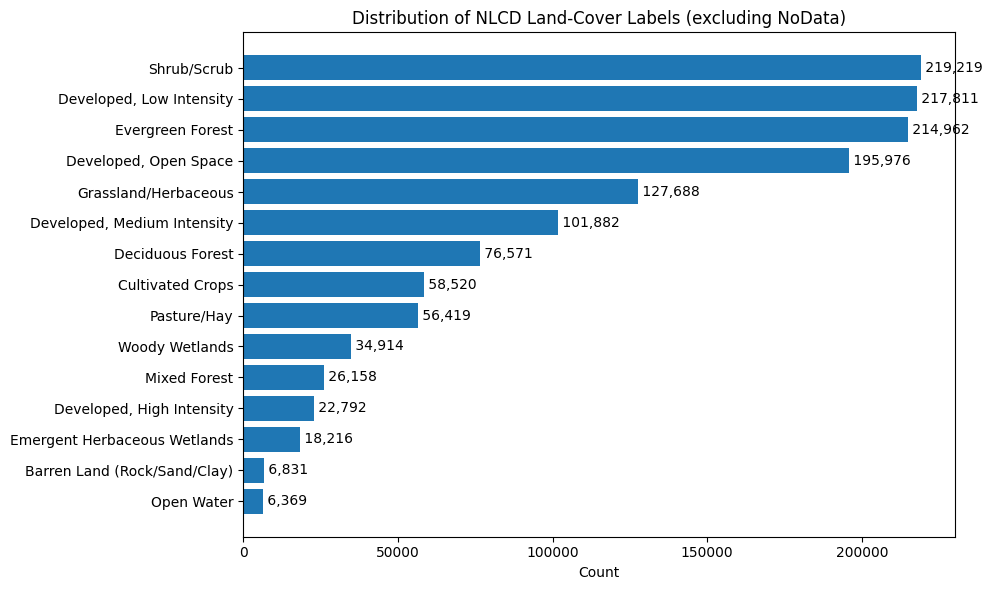

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

_src = df_clean if "df_clean" in globals() else df  # choose active dataframe

# Safety checks
for c in ("nlcd_label", "nlcd_code"):
    if c not in _src.columns:
        raise KeyError(f"Column '{c}' not found. Run the NLCD labeling cell first.")

# Exclude NoData
df_plot = _src.loc[_src["nlcd_code"] != -9999].copy()

# Aggregate counts
counts = df_plot["nlcd_label"].value_counts(dropna=False).sort_values(ascending=True)
labels = counts.index.to_list()
values = counts.values

# Single horizontal bar chart (matplotlib only; default colors)
plt.figure(figsize=(10, 6))
y = np.arange(len(labels))
plt.barh(y, values)

# Annotate bars with counts
for i, v in enumerate(values):
    plt.text(v, i, f" {v:,}", va="center")

plt.yticks(y, labels)
plt.xlabel("Count")
plt.title("Distribution of NLCD Land-Cover Labels (excluding NoData)")
plt.tight_layout()
plt.show()

In [ ]:
import os, math, time
import numpy as np, pandas as pd, rasterio, pyproj
from rasterio.windows import Window

# --- Config
DEM_PATH   = "/Users/anatolelobenko/Downloads/LF2020_Elev_220_CONUS/Tif/LC20_Elev_220.tif"
SLOPE_PATH = "/Users/anatolelobenko/Downloads/LF2020_SlpD_220_CONUS/Tif/LC20_SlpD_220.tif"
ROUND = 6                       # dedup precision
GDAL_MB = 4096                 # cache cap (MB)
PROGRESS_EVERY = 300            # report every N blocks

# --- Source table (1.5M rows, contains duplicates)
_src = df_clean if "df_clean" in globals() else df
assert {"longitude","latitude"}.issubset(_src.columns)

# --- Deduplicate to ~36k unique pairs (rounded)
U = (_src[["longitude","latitude"]]
     .dropna()
     .round({"longitude":ROUND,"latitude":ROUND})
     .drop_duplicates()
     .reset_index(drop=True))

# --- Open datasets under a constrained GDAL environment
env = rasterio.Env(GDAL_CACHEMAX=GDAL_MB)  # MB
env.__enter__()
try:
    with rasterio.open(DEM_PATH) as dem, rasterio.open(SLOPE_PATH) as slp:
        # Sanity: same grid
        assert dem.crs == slp.crs and dem.transform == slp.transform \
               and dem.width == slp.width and dem.height == slp.height

        # Vectorized lon/lat -> CRS -> pixel coords
        to_dem = pyproj.Transformer.from_crs("EPSG:4326", dem.crs, always_xy=True)
        X, Y = to_dem.transform(U["longitude"].values, U["latitude"].values)
        cols, rows = (~dem.transform) * (X, Y)        # continuous pixel coords
        c0 = np.floor(cols).astype(np.int32)
        r0 = np.floor(rows).astype(np.int32)
        dx = (cols - c0).astype(np.float32)
        dy = (rows - r0).astype(np.float32)

        # Keep only points with a valid 2x2 neighborhood
        ok = (c0 >= 0) & (r0 >= 0) & (c0+1 < dem.width) & (r0+1 < dem.height)
        U_ok_idx = np.where(ok)[0]
        c0, r0, dx, dy = c0[ok], r0[ok], dx[ok], dy[ok]

        # Bucket by internal block to minimize random I/O
        bh, bw = dem.block_shapes[0]       # e.g., 512x512
        b_row = (r0 // bh).astype(np.int32)
        b_col = (c0 // bw).astype(np.int32)
        # compact integer key per block, then sort to process sequentially
        keys = (b_row.astype(np.int64) << 21) | b_col.astype(np.int64)
        order = np.argsort(keys)
        keys_sorted = keys[order]

        elev_out  = np.full(len(U), np.nan, dtype=np.float32)
        slope_out = np.full(len(U), np.nan, dtype=np.float32)

        # Vectorized bilinear kernel on arrays
        def bilinear_block(arr, rr, cc, dx, dy):
            v00 = arr[rr,   cc  ]
            v10 = arr[rr,   cc+1]
            v01 = arr[rr+1, cc  ]
            v11 = arr[rr+1, cc+1]
            return (v00*(1-dx)*(1-dy) + v10*dx*(1-dy) + v01*(1-dx)*dy + v11*dx*dy)

        t0 = time.perf_counter()
        i = 0; blocks_done = 0
        n = len(keys_sorted)

        while i < n:
            j = i + 1
            k = keys_sorted[i]
            # gather contiguous run of same block
            while j < n and keys_sorted[j] == k:
                j += 1
            idx_run = order[i:j]        # positions within U_ok arrays for this block

            br = int(b_row[idx_run[0]])
            bc = int(b_col[idx_run[0]])
            r_start, c_start = br*bh, bc*bw
            # +1 pad for bilinear neighbors
            r_end = min(r_start + bh + 1, dem.height)
            c_end = min(c_start + bw + 1, dem.width)
            win = Window(c_start, r_start, c_end - c_start, r_end - r_start)

            # Read one block per raster (float32 to reduce RAM)
            dem_blk = dem.read(1, window=win, out_dtype="float32")
            slp_blk = slp.read(1, window=win, out_dtype="float32")

            # Convert NODATA to NaN to avoid propagating invalids
            if dem.nodata is not None:
                dem_blk = np.where(dem_blk == dem.nodata, np.nan, dem_blk)
            if slp.nodata is not None:
                slp_blk = np.where(slp_blk == slp.nodata, np.nan, slp_blk)

            # Local pixel coords inside this block
            rr = (r0[idx_run] - r_start).astype(np.int32)
            cc = (c0[idx_run] - c_start).astype(np.int32)
            dx_i, dy_i = dx[idx_run], dy[idx_run]

            # guard inner domain
            inner = (rr >= 0) & (cc >= 0) & (rr < dem_blk.shape[0]-1) & (cc < dem_blk.shape[1]-1)
            if np.any(inner):
                ii     = idx_run[inner]
                vals_e = bilinear_block(dem_blk, rr[inner], cc[inner], dx_i[inner], dy_i[inner])
                vals_s = bilinear_block(slp_blk, rr[inner], cc[inner], dx_i[inner], dy_i[inner])
                # write back to absolute positions in U
                Upos = U_ok_idx[ii]     # map block-run indices back to U row indices
                elev_out[Upos]  = vals_e
                slope_out[Upos] = vals_s

            blocks_done += 1
            if blocks_done % PROGRESS_EVERY == 0:
                elapsed = time.perf_counter() - t0
                rate_pts = (len(idx_run) * PROGRESS_EVERY) / elapsed
                print(f"Blocks: {blocks_done:,}  LastRunPts: {len(idx_run):,}  "
                      f"Elapsed: {elapsed:6.1f}s  ~{rate_pts:,.0f} pts/s")
                t0 = time.perf_counter()

            i = j  # next block

finally:
    env.__exit__(None, None, None)

# Attach to U and merge back to full 1.5M rows
U["elevation_m"] = elev_out
U["slope_deg"]   = slope_out

_src_round = _src.copy()
_src_round["longitude"] = _src_round["longitude"].round(ROUND)
_src_round["latitude"]  = _src_round["latitude"].round(ROUND)
df_terrain = _src_round.merge(U, on=["longitude","latitude"], how="left")

Blocks: 300  LastRunPts: 1  Elapsed:    0.3s  ~983 pts/s
Blocks: 600  LastRunPts: 2  Elapsed:    0.3s  ~1,973 pts/s
Blocks: 900  LastRunPts: 1  Elapsed:    0.3s  ~1,051 pts/s
Blocks: 1,200  LastRunPts: 1  Elapsed:    0.3s  ~1,023 pts/s
Blocks: 1,500  LastRunPts: 1  Elapsed:    0.3s  ~1,068 pts/s
Blocks: 1,800  LastRunPts: 1  Elapsed:    0.3s  ~1,024 pts/s
Blocks: 2,100  LastRunPts: 1  Elapsed:    0.3s  ~1,071 pts/s
Blocks: 2,400  LastRunPts: 1  Elapsed:    0.3s  ~1,013 pts/s
Blocks: 2,700  LastRunPts: 1  Elapsed:    0.3s  ~953 pts/s
Blocks: 3,000  LastRunPts: 1  Elapsed:    0.3s  ~1,010 pts/s
Blocks: 3,300  LastRunPts: 1  Elapsed:    0.3s  ~1,024 pts/s
Blocks: 3,600  LastRunPts: 1  Elapsed:    0.3s  ~1,034 pts/s
Blocks: 3,900  LastRunPts: 1  Elapsed:    0.3s  ~1,047 pts/s
Blocks: 4,200  LastRunPts: 1  Elapsed:    0.3s  ~1,139 pts/s
Blocks: 4,500  LastRunPts: 1  Elapsed:    0.3s  ~1,087 pts/s
Blocks: 4,800  LastRunPts: 1  Elapsed:    0.3s  ~1,060 pts/s
Blocks: 5,100  LastRunPts: 1  Elap

In [ ]:
df_terrain[["elevation_m","slope_deg"]].isna().mean()

elevation_m    0.0
slope_deg      0.0
dtype: float64

In [ ]:
df_terrain[["elevation_m","slope_deg"]].describe(percentiles=[.01,.5,.99])

,elevation_m,slope_deg
count,1.384405e+06,1.384405e+06
mean,7.740900e+02,5.630893e+00
std,7.179008e+02,7.107588e+00
min,-6.600000e+01,0.000000e+00
1%,2.000000e+00,0.000000e+00
50%,5.023363e+02,2.875898e+00
99%,2.737785e+03,3.165613e+01
max,3.640669e+03,5.916439e+01


In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np

out_dir = Path("/Users/anatolelobenko/Downloads/terrain_outputs")
out_dir.mkdir(parents=True, exist_ok=True)

df_save = df_terrain.copy()
for c in ("elevation_m","slope_deg"):
    if c in df_save: df_save[c] = df_save[c].astype("float32")
for c in ("longitude","latitude"):
    if c in df_save: df_save[c] = df_save[c].astype("float64")

pq_path  = out_dir / "dataset_with_terrain.parquet"
csv_path = out_dir / "dataset_with_terrain.csv.gz"

def try_parquet(df, path):
    try:
        import pyarrow  # noqa: F401
        df.to_parquet(path, index=False, engine="pyarrow")
        return f"Parquet saved → {path}"
    except Exception:
        try:
            import fastparquet  # noqa: F401
            df.to_parquet(path, index=False, engine="fastparquet")
            return f"Parquet saved (fastparquet) → {path}"
        except Exception:
            return None

msg = try_parquet(df_save, pq_path)
if msg is None:
    df_save.to_csv(csv_path, index=False, compression="gzip", float_format="%.8f")
    msg = f"No Parquet engine; wrote compressed CSV → {csv_path}"

print(msg)

No Parquet engine; wrote compressed CSV → /Users/anatolelobenko/Downloads/terrain_outputs/dataset_with_terrain.csv.gz
